pkl_files/MPHASE/AIRTRACER/C325r1t_part_poss.pkl
pkl_files/MPHASE/AIRTRACER/C325r2t_part_poss.pkl
pkl_files/MPHASE/AIRTRACER/C325r1t_part_poss.pkl
pkl_files/MPHASE/AIRTRACER/C326r1t_part_poss.pkl
pkl_files/MPHASE/AIRTRACER/C327r1t_part_poss.pkl
pkl_files/MPHASE/AIRTRACER/C327r2t_part_poss.pkl
pkl_files/MPHASE/AIRTRACER/C327r4t_part_poss.pkl
pkl_files/MPHASE/AIRTRACER/C329r2t_part_poss.pkl


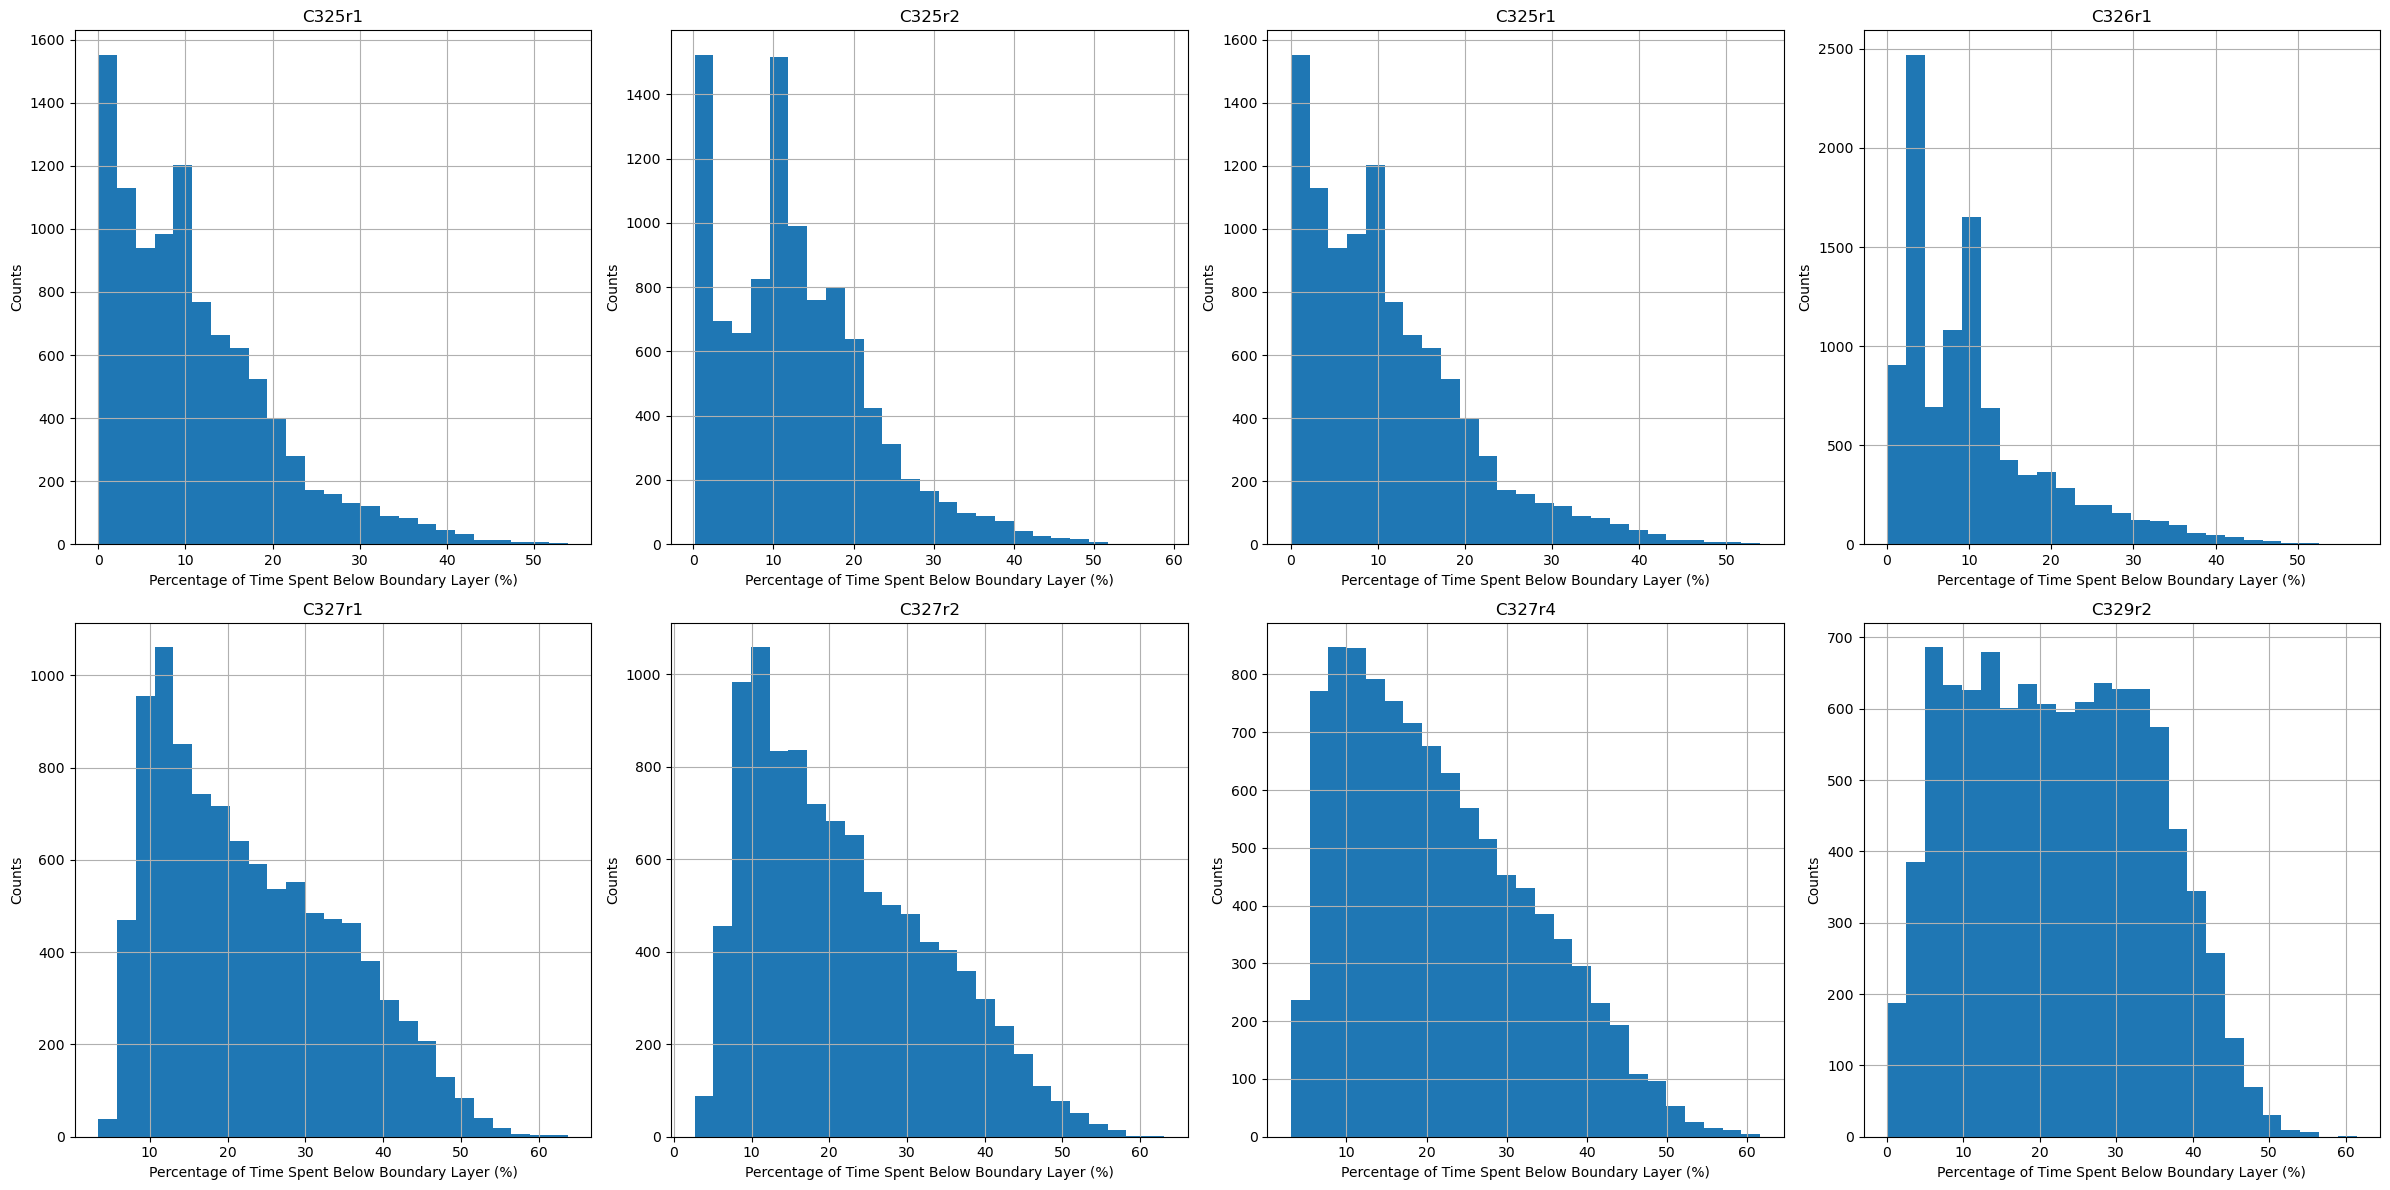

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

# NW flow CAOs = [
#         'pkl_files/MPHASE/AIRTRACER/C321r1t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C321r3t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C322r1t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C322r2t_part_poss.pkl',
#         # 'pkl_files/MPHASE/AIRTRACER/C323r3t_part_poss.pkl', #G
#         'pkl_files/MPHASE/AIRTRACER/C323r4t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C328r1t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C328r2t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C330r1t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C330r2t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C331r3t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C331r4t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C332r1t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C332r2t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C333r1t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C333r2t_part_poss.pkl',
#         'pkl_files/MPHASE/AIRTRACER/C333r3t_part_poss.pkl',
#     ]

def plot_histogram(ax, data, title):
    heights = data[:, 2, :] 
    bl_heights = data[:, 3, :] 
    
    total_time_steps = data.shape[2]
    
    mask = heights < bl_heights
    time_below_bl = np.sum(mask, axis=1)
    percentage_below_bl = (time_below_bl / total_time_steps) * 100
    
    ax.hist(percentage_below_bl, bins=25)
    ax.set_xlabel('Percentage of Time Spent Below Boundary Layer (%)')
    ax.set_ylabel('Counts')
    ax.set_title(title)
    ax.grid(True)

def main(pkl_files):
    num_files = len(pkl_files)
    nrows = 2
    ncols = (num_files + nrows - 1) // nrows  
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 12)) # Edit depending on format
    axs = axs.flatten()  

    for i, pkl_file in enumerate(pkl_files):
        print(pkl_file)
        with open(pkl_file, 'rb') as f:
            data = pickle.load(f)
        name = os.path.basename(pkl_file[:-15])
        plot_histogram(axs[i], data, name)

    for j in range(num_files, len(axs)):
        axs[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    # plt.savefig(fname='W_histigram_AIRTRACER.png', dpi=300, format='png')
    # plt.close()

if __name__ == "__main__":
    # W CAO flows
    pkl_files = [
        'pkl_files/MPHASE/AIRTRACER/C325r1t_part_poss.pkl',
        'pkl_files/MPHASE/AIRTRACER/C325r2t_part_poss.pkl',
        'pkl_files/MPHASE/AIRTRACER/C325r1t_part_poss.pkl',
        'pkl_files/MPHASE/AIRTRACER/C326r1t_part_poss.pkl',
        'pkl_files/MPHASE/AIRTRACER/C327r1t_part_poss.pkl',
        'pkl_files/MPHASE/AIRTRACER/C327r2t_part_poss.pkl',
        'pkl_files/MPHASE/AIRTRACER/C327r4t_part_poss.pkl',
        'pkl_files/MPHASE/AIRTRACER/C329r2t_part_poss.pkl'
    ]
    main(pkl_files)